In [6]:
# Necessary libraries
# !pip install pandas numpy matplotlib seaborn scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Show all columns -> Big dataset
pd.set_option('display.max_columns', None)

## Load Dataset

In [8]:
# Load the dataset
df = pd.read_csv('./diabetes_012_health_indicators_BRFSS2015.csv')
print(df.head())

   Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  HvyAlcoholConsump  \
0                   0.0           0.0     0.0      1.0                0.0   
1                   0.0           1.0     0.0      0.0                0.0   
2                   0.0           0.0     1.0      0.0                0.0   
3                   0.0           1.0     1.0      1.0                0.0   
4                   0.0           1.0     1.0      1.0                0.0   

   AnyHealthcare  NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex  \
0            1.0          0.0      5.0 

## Inspect Data

In [9]:
print(df.info()) # Check data types and missing values
print(df.describe()) # Summary of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

## Missing Valuees

In [10]:
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


## Remove Duplicates

In [11]:
initial_shape = df.shape
df = df.drop_duplicates()
final_shape = df.shape
print("Initial shape: ", initial_shape)
print("Final shape: ", final_shape)

Initial shape:  (253680, 22)
Final shape:  (229781, 22)


## Data Type Conversion
The dataset contains 22 columns, all set to `float64. However, some columns are essentially binary categorical or binary in nature and should not be represented as floats.

### Binary/Categorical Columns: 
- Convert these columns to integers since they represent distinct categories (0 or 1).

- HighBP, HighChol, CholCheck, Smoker, Stroke, HeartDiseaseorAttack, PhysActivity, Fruits, Veggies, HvyAlcoholConsump, AnyHealthcare, NoDocbcCost, DiffWalk, Sex

### Ordinal Data Columns
- Numerical columns but they represent ordered categories, conversion to integer is appropriate

- GenHlth (ranging from 1 to 5)
- MentHlth and PhysHlth (number of days out of 30, typically integers)
- Age (coded age group ranges, which can be kept as integers)
- Education (1 to 6, education levels)
- Income (income categories from 1 to 8)

### Continuous Data Columns
- BMI is correctly set as float because it is a continuous measure

In [12]:
binary_columns = [
    'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 
    'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 
    'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex'
]

ordinal_columns = ['GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']

# Convert binary columns to int
df[binary_columns] = df[binary_columns].astype(int)

# Convert ordinal columns to int (they are categorical but ordered)
df[ordinal_columns] = df[ordinal_columns].astype(int)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 229781 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          229781 non-null  float64
 1   HighBP                229781 non-null  int64  
 2   HighChol              229781 non-null  int64  
 3   CholCheck             229781 non-null  int64  
 4   BMI                   229781 non-null  float64
 5   Smoker                229781 non-null  int64  
 6   Stroke                229781 non-null  int64  
 7   HeartDiseaseorAttack  229781 non-null  int64  
 8   PhysActivity          229781 non-null  int64  
 9   Fruits                229781 non-null  int64  
 10  Veggies               229781 non-null  int64  
 11  HvyAlcoholConsump     229781 non-null  int64  
 12  AnyHealthcare         229781 non-null  int64  
 13  NoDocbcCost           229781 non-null  int64  
 14  GenHlth               229781 non-null  int64  
 15  MentH

## Visualise the data

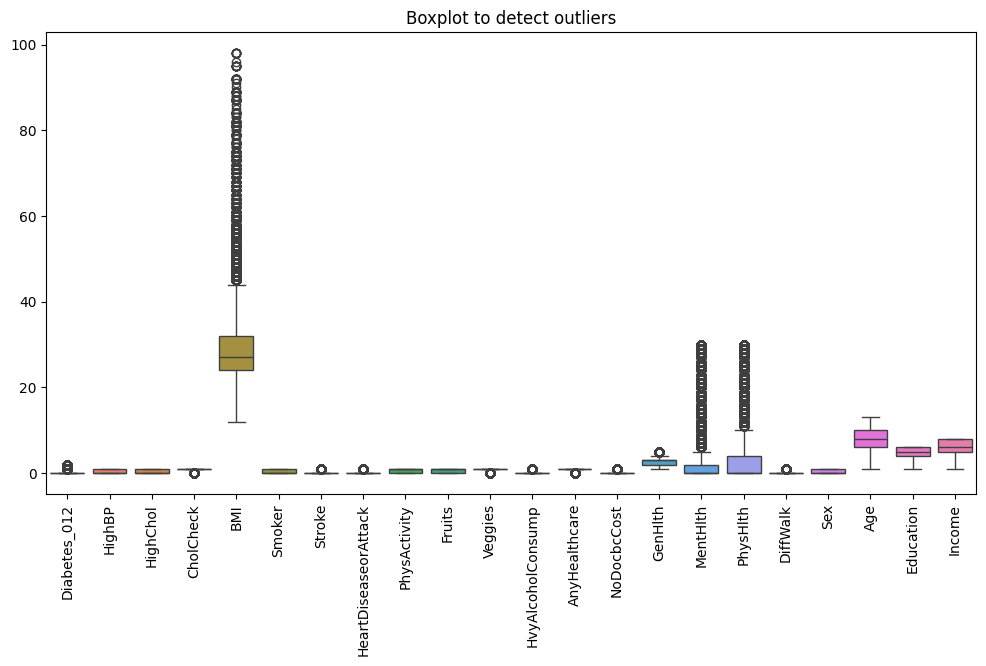

In [14]:
plt.figure(figsize=(12,6))
# Boxplot: It displays the distribution of data based on a five-number summary:
# minimum, first quartile (Q1), median, third quartile (Q3), and maximum.
sns.boxplot(data=df)
plt.title('Boxplot to detect outliers')
plt.xticks(rotation=90)
plt.show()

### Interpreting the Boxplot
 - **Whiskers**: The lines extending from the box that represent the range of the data within 1.5 times the IQR. Data points outside this range are considered as potential outliers.
 - **Outliers**: Points outside the whiskers, appearing as circles, represent data points that are significantly different from the bulk of the data.

#### Handling Outliers
